In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans, OPTICS
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import pdist, cosine
import matplotlib.pyplot as plt

from transformers import BertTokenizer, BertModel
import torch

C:\Users\Milosz\miniconda3\envs\kosciuszkon\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("../data/hobbies.csv")

In [3]:
df.to_csv("../data/hobbies1.csv")

In [3]:
df

,HOBBIES
0,Acting
1,Action Figures
2,Adventure park
3,Aerobics
4,Air hockey
...,...
737,Yo-yoing
738,Yoga
739,YoYo
740,Ziplining


In [4]:
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [5]:
def embed(sentence):
    tokens = tokenizer.encode(sentence, add_special_tokens=True)
    input_ids = torch.tensor([tokens])
    with torch.no_grad():
        outputs = model(input_ids)
        embeddings = outputs.last_hidden_state

    return embeddings[0].mean(axis=0).numpy()

In [7]:
s_bert = np.stack(df['HOBBIES'].apply(embed))

In [8]:
s_bert

array([[ 0.05780482,  0.2194282 , -0.4078196 , ..., -0.30458406,
        -0.24937482, -0.21889877],
       [-0.01994592, -0.15702362, -0.3982211 , ..., -0.03904746,
         0.04473481, -0.23146155],
       [ 0.01640029, -0.43739   , -0.03793653, ...,  0.28622743,
         0.08549547, -0.28128397],
       ...,
       [ 0.00238839,  0.14492184,  0.22684677, ..., -0.11174591,
         0.03561552,  0.11539952],
       [ 0.2759493 , -0.37829688, -0.03586436, ...,  0.11101593,
        -0.33802032, -0.27320743],
       [-0.19350235, -0.4220682 , -0.17620218, ...,  0.36637017,
        -0.28235638,  0.05846604]], dtype=float32)

In [16]:
s_bert.shape

(742, 768)

In [17]:
np.save("../data/embeds_bert_768.npy", s_bert) 

In [9]:
tsne = TSNE(n_components=2, random_state=42)
embedded_matrix = tsne.fit_transform(s_bert)

In [12]:
#dbscan = DBSCAN(eps=5.0, min_samples=3)
#labels = dbscan.fit_predict(s_bert)

kmeans = KMeans(n_clusters=50, random_state=42)
kmeans.fit(s_bert)
labels = kmeans.labels_

C:\Users\Milosz\miniconda3\envs\kosciuszkon\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


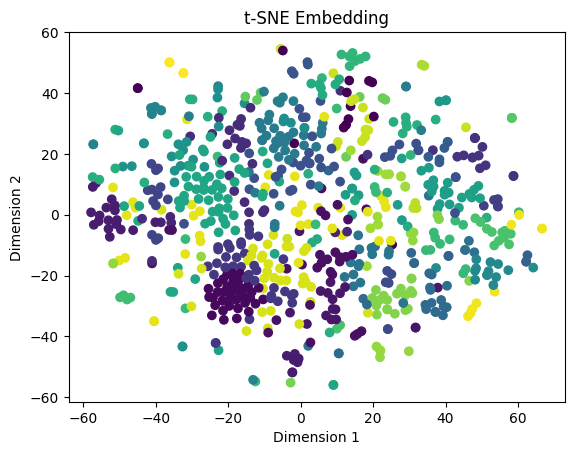

In [13]:
# Plot the embedded matrix
plt.scatter(embedded_matrix[:, 0], embedded_matrix[:, 1], c=labels)
plt.title("t-SNE Embedding")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [14]:
df['labels'] = labels
df_sorted = df.sort_values(by=['labels', 'HOBBIES'])

In [20]:
df.to_csv("../data/hobbies_clusters.csv")

In [15]:
df_sorted.groupby('labels').apply(display)

,HOBBIES,labels
443,Foreign language learning,0
471,Handwriting Analysis,0
523,Learning A Foreign Language,0
583,Playing music,0
70,Self-Improvement Courses,0
78,Shortwave listening,0
643,Shortwave listening,0
79,Show Choir,0
645,Singing In Choir,0
82,Singing Lessons,0


,HOBBIES,labels
56,Baking,1
350,Camping,1
366,Collecting,1
375,Coloring,1
385,Crafts,1
393,Curling,1
407,Dolls,1
411,Drawing,1
419,Entertaining,1
439,Flying,1


,HOBBIES,labels
12,Alternative,2
291,Aquarium,2
31,Architecture,2
36,Art collecting,2
293,Art collecting,2
40,Artwork,2
355,Cartooning,2
358,Ceramics,2
402,Digital Photography,2
435,Floral Arrangements,2


,HOBBIES,labels
294,Arts,3
57,Ballet,3
394,Cycling,3
395,Dance,3
396,Dancing,3
493,Jet Engines,3
546,Microscopy,3
555,Motorcycles,3
627,Sailing,3
88,Skating,3


,HOBBIES,labels
1,Action Figures,4
11,Alternate reality games,4
27,Arcade Games,4
301,Backgammon,4
326,Board games,4
328,BoardGames,4
354,Card collecting,4
400,Diecast Collectibles,4
140,Street games,4
676,Sudoku,4


,HOBBIES,labels
34,Art Collecting / Collectibles,5
37,Art/antique collecting,5
559,Movie and movie memorabilia collecting,5
129,Sports memorabilia,5
130,Sports on TV,5


,HOBBIES,labels
315,Bell Ringing,6
339,Breakdancing,6
346,Butterfly Watching,6
362,Cigar Smoking,6
373,Collecting Swords,6
404,Do it yourself,6
440,Footbag,6
457,Glowsticking,6
464,Grip Strength,6
498,Juggling,6


,HOBBIES,labels
318,Bicycling,7
503,Kayaking,7
509,Kitesurfing,7
573,Parachuting,7
574,Paragliding or Power Paragliding,7
63,Sculling or Rowing,7
633,Sculling or Rowing,7
97,Skydiving,7
98,Skydiving,7
652,Skydiving,7


,HOBBIES,labels
51,Back packing,8
341,Bridge,8
363,Climbing,8
364,Cloud Watching,8
381,Cooking,8
398,Debate,8
412,Driving,8
414,Eating out,8
422,Exercise,8
448,Gambling,8


,HOBBIES,labels
107,Snow Skiing,9
108,Snow skiing,9
109,Snowboarding,9
659,Snowboarding,9
224,Water Skiing,9


,HOBBIES,labels
333,Book collecting,10
365,Coin Collecting,10
370,Collecting Music Albums,10
371,Collecting RPM Records,10
376,Comic book collecting,10
609,Record collecting,10
67,Seashell collecting,10
636,Seashell collecting,10
68,Seashells,10
133,Stamp Collecting,10


,HOBBIES,labels
18,American football,11
283,American football,11
41,Association football,11
295,Association football,11
45,Australian Football League,11
625,Rugby league football,11


,HOBBIES,labels
614,Abandoned Animals,12
277,Aircraft Spotting,12
8,Aircraft spotting,12
22,Animal care,12
53,Backpacking,12
302,Backpacking,12
314,Beekeeping,12
320,Bird watching,12
321,Birding,12
332,Bonsai Tree,12


,HOBBIES,labels
343,Bringing Food To The Disabled,13
608,Reading To The Elderly,13
77,Shopping for latest trends,13
662,Socializing with friends/neighbors,13
666,Spending time with family/kids,13


,HOBBIES,labels
311,Beachcombing,14
105,Snorkeling,14
658,Snorkeling,14
232,White Water Rafting,14
233,Whitewater rafting,14
234,Wildlife safari Snorkeling A,14


,HOBBIES,labels
75,Shooting sport,15
641,Shooting sport,15
647,Skeet Shooting,15
155,Target shooting,15
156,Target shooting,15


,HOBBIES,labels
5,Air sports,16
275,Air sports,16
48,Autographs,16
554,Motor sports,16


,HOBBIES,labels
0,Acting,17
273,Acting,17
29,Archery,17
292,Archery,17
337,Boxing,17
359,Cheerleading,17
427,Fencing,17
468,Gymnastics,17
497,Judo,17
564,Netball,17


,HOBBIES,labels
148,Swimming pool,18
223,Water Polo,18
225,Water sports,18
721,Water sports,18
93,free diving,18


,HOBBIES,labels
28,Archaeology,19
33,Art Activities,19
43,Astronomy,19
297,Astronomy,19
356,Casino Gambling,19
378,Computer activities,19
379,Computer programming,19
203,DVD,19
410,Drama,19
415,Educational Courses,19


,HOBBIES,labels
32,Aromatherapy,20
49,Automotive work/repair,20
340,Brewing Beer,20
348,Cake Decorating,20
432,Fishkeeping,20
436,Flower arranging,20
437,Flower collecting and pressing,20
451,Garage Saleing,20
475,Home Brewing,20
476,Home Repair,20


,HOBBIES,labels
6,Airbrushing,21
276,Airbrushing,21
389,Crocheting,21
64,Sculpting,21
634,Sculpting,21
648,Sketching,21
309,Sun tanning,21
142,Sunbathing,21
226,Watercolor Paintings,21


,HOBBIES,labels
44,Audiophilia,22
298,Audiophilia,22
46,Auto audiophilia,22
299,Auto audiophilia,22
382,Cosplay,22
179,Trainspotting,22
699,Trainspotting,22
706,Ultimate Frisbee,22
205,Videophilia,22
712,Videophilia,22


,HOBBIES,labels
308,Beach Volleyball,23
319,Billiards,23
428,Field hockey,23
501,Kabaddi,23
521,Lawn Darts,23
601,Racquetball,23
149,Table Tennis,23
150,Table football,23
681,Table football,23
151,Table tennis,23


,HOBBIES,labels
30,Archery/Crossbow,24
383,Cosplaying,24
467,Gunsmithing,24
526,Leather crafting,24
527,Leathercrafting,24
540,Marksmanship,24
594,Pyrotechnics,24
656,Slingshots,24
246,Woodworking,24
728,Woodworking,24


,HOBBIES,labels
312,Beadwork,25
430,Fire Poi,25
456,Glassblowing,25
458,Gnoming,25
462,Gongoozling,25
469,Gyotaku,25
499,Jukskei,25
535,Macrame,25
534,Macramé,25
537,Mahjong,25


,HOBBIES,labels
9,Airsoft,26
278,Airsoft,26
279,Airsofting,26


,HOBBIES,labels
10,All-Terrain vehicles,27
323,Blacksmithing,27
342,Bridge Building,27
352,Canoeing,27
357,Cave Diving,27
506,Kite Boarding,27
550,Model Railroading,27
582,Planking,27
595,Quilting,27
603,Rafting,27


,HOBBIES,labels
322,Birdwatching,28
472,Hang gliding,28
556,Mountain Biking,28
557,Mountain Climbing,28
558,Mountaineering,28
566,Orienteering,28
617,Rock climbing,28
187,Tree climbing,28
189,Trekking,28


,HOBBIES,labels
284,Animal fancy,29
24,Antiquing,29
288,Antiquing,29
54,Badge Collecting,29
345,Bus spotting,29
347,Button Collecting,29
351,Candle making,29
369,Collecting Hats,29
380,Conworlding,29
384,Couponing,29


,HOBBIES,labels
344,Building Dollhouses,30
372,Collecting Sports Cards,30
522,Learn to Play Poker,30
525,Learning To Pilot A Plane,30
538,Making Model Cars,30
551,Model Rockets,30
548,Model aircraft,30
549,Model building,30
568,Owning An Antique Car,30
602,Radio-controlled car racing,30


,HOBBIES,labels
274,Aeromodeling,31
307,Baton Twirling,31
316,Belly Dancing,31
334,Bookbinding,31
335,Boomerangs,31
391,Crossword Puzzles,31
454,Geocaching,31
481,Hot air ballooning,31
486,Iceskating,31
495,Jigsaw Puzzles,31


,HOBBIES,labels
459,Going to movies,32
531,Listening to music,32
612,Renting movies,32
80,Sightseeing,32
219,Watching Movies,32
220,Watching Sports,32
221,Watching TV,32
222,Watching movies,32
719,Watching movies,32
720,Watching sporting events,32


,HOBBIES,labels
50,BMX tricks,33
304,Base Jumping,33
317,Bicycle Polo,33
327,Board sports,33
406,Dog sport,33
420,Equestrianism,33
433,Flag Football,33
434,Floorball,33
447,Frisbee Golf,33
479,Hooping,33


,HOBBIES,labels
596,R/C Boats,34
597,R/C Cars,34
598,R/C Helicopters,34
599,R/C Planes,34


,HOBBIES,labels
58,Ballet Dancing,35
429,Figure skating,35
484,Ice hockey,35
485,Ice skating,35
489,Inline skating,35
565,Nordic skating,35
587,Pole Dancing,35
623,Roller skating,35
85,Skate Boarding,35
86,Skateboarding,35


,HOBBIES,labels
13,Amateur Radio,36
282,Amateur Radio,36
17,Amateur radio,36


,HOBBIES,labels
388,Crochet,37
390,Cross-Stitch,37
580,Pinochle,37


,HOBBIES,labels
377,Compose Music,38
561,Musical Instruments,38
584,Playing musical instruments,38
132,Stained Glass,38


,HOBBIES,labels
621,Roleplaying,39


,HOBBIES,labels
177,Field,40
4,Air hockey,40
55,Badminton,40
303,Badminton,40
305,Baseball,40
306,Basketball,40
336,Bowling,40
387,Cricket,40
403,Disc golf,40
441,Football,40


,HOBBIES,labels
19,Amusement Park,41
20,Amusement park,41
47,Auto racing,41
300,Auto racing,41
353,Car Racing,41
502,Kart racing,41
622,Roller derby,41
102,Slot car racing,41
657,Slot car racing,41
139,Street Racing,41


,HOBBIES,labels
14,Amateur astronomy,42
280,Amateur astronomy,42
15,Amateur geology,42
281,Amateur geology,42
16,Amateur meteorology,42
42,Astrology,42
296,Astrology,42
349,Calligraphy,42
392,Cryptography,42
545,Meteorology,42


,HOBBIES,labels
35,Art and Crafts,43
38,Arts and Crafts,43


,HOBBIES,labels
26,Aquariums,44
446,Freshwater Aquariums,44
628,Saltwater Aquariums,44


,HOBBIES,labels
313,Beatboxing,45
324,Blogging,45
386,Creative writing,45
504,Keep A Journal,45
530,Letterboxing,45
606,Rapping,45
69,Self-Improvement,45
99,Skype,45
117,Social Networking,45
164,Texting,45


,HOBBIES,labels
7,Aircraft,46
21,Animal,46
287,Animals,46
23,Antiques,46
25,Antiquities,46
289,Antiquities,46
310,Beach,46
329,Boating,46
360,Chess,46
368,Collecting Artwork,46


,HOBBIES,labels
2,Adventure park,47
290,Aqua-lung,47
39,Arts/cultural,47
52,Backgamon,47
59,Ballooning,47
361,Church/church activities,47
399,Deltiology,47
401,Digital arts,47
408,Dominoes,47
425,Fast cars,47


,HOBBIES,labels
3,Aerobics,48
325,BMX,48
330,Body Building,48
331,Bodybuilding,48
338,Brazilian jiu-jitsu,48
541,Martial arts,48
703,Triathlon,48
230,Weight training,48
421,aerobics,48


,HOBBIES,labels
254,Yo-yoing,49
737,Yo-yoing,49
255,YoYo,49
739,YoYo,49
259,Yoyo,49


""


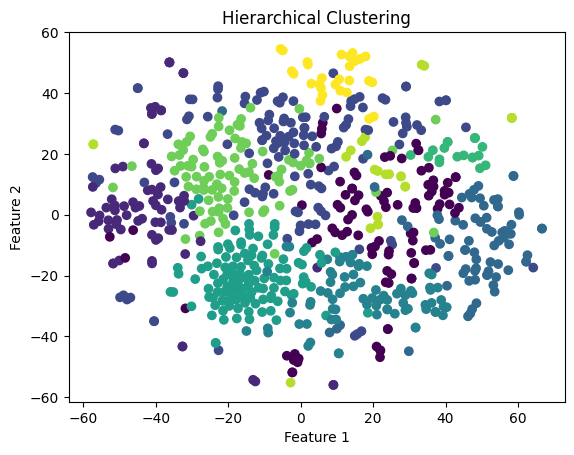

In [10]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Assuming you have a dataset named 'data' with shape (n_samples, n_features)
# Replace 'data' with your actual dataset

# Instantiate the AgglomerativeClustering object
clustering = AgglomerativeClustering(n_clusters=10)

# Perform hierarchical clustering on the data
labels = clustering.fit_predict(s_bert)

# Plot the clustering result
plt.scatter(embedded_matrix[:, 0], embedded_matrix[:, 1], c=labels)
plt.title("Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
s_bert

In [ ]:
s = 0
for i in range(1, s_bert.shape[0]):
    s += i
print(s)

In [21]:
dists = pdist(s_bert, metric='cosine')

[  448  4235 25436 70534 94902 59449 16641  2883   328    55] [0.         0.08877956 0.17755913 0.26633869 0.35511825 0.44389782
 0.53267738 0.62145694 0.71023651 0.79901607 0.88779563]


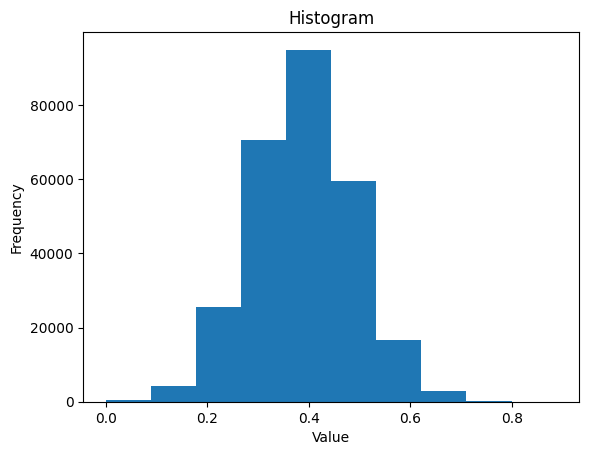

In [22]:
hist, bins = np.histogram(dists, bins=10)
print(hist, bins)
# Plot the histogram
plt.hist(dists, bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

In [79]:
paths = []

for idx_i, i in enumerate(s_bert):
    for idx_j, j in enumerate(s_bert):
        if cosine(i, j) < 0.15 and idx_i != idx_j:
            paths.append([idx_i, idx_j, 1-cosine(i, j)])

In [80]:
n_nodes = df.shape[0]
adj_matr = np.zeros((n_nodes, n_nodes))
weight_matr = np.zeros((n_nodes, n_nodes))

In [81]:
for x, y, w in paths:
    if x != y:
        adj_matr[y, x] = 1
        adj_matr[x, y] = 1
        weight_matr[x, y] = w

In [82]:
adj_matr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [90]:
import networkx as nx

In [91]:
G = nx.from_numpy_array(adj_matr)

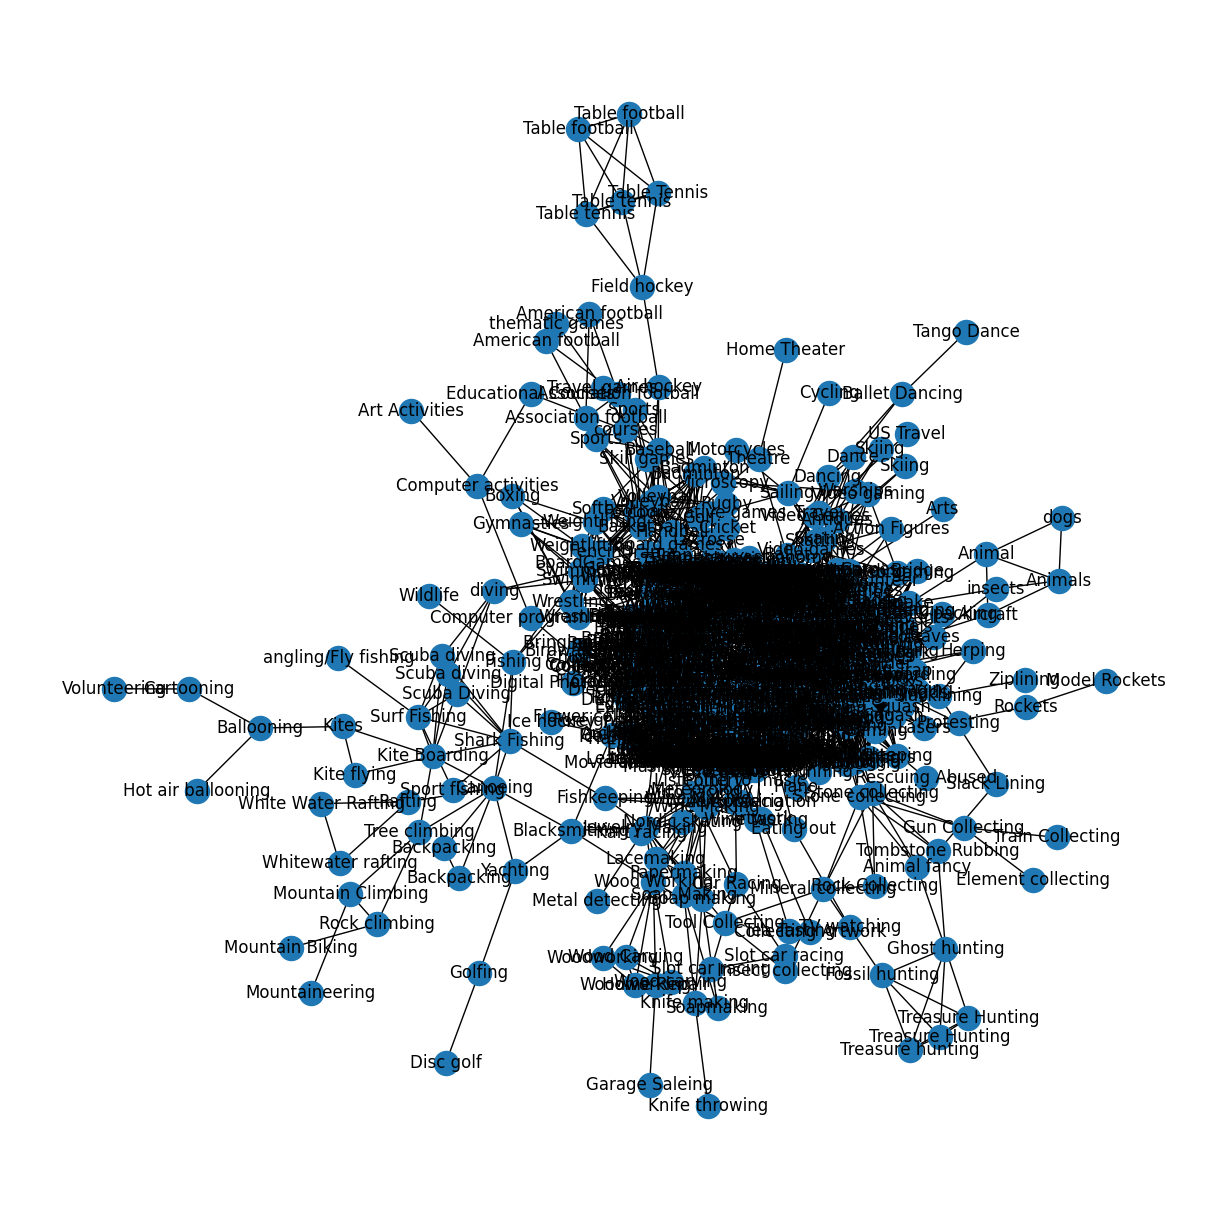

In [103]:
plt.figure(3,figsize=(12,12))
nx.draw_kamada_kawai(G, labels=df['HOBBIES'], with_labels=True)

In [104]:
np.save("../data/adj_hobbies.npy", adj_matr)
np.save("../data/weight_adj_hobbies.npy", weight_matr)

In [113]:
pd.read_csv("../data/hobbies_clusters.csv", index_col=[0]).to_dict()['HOBBIES']

{0: 'Acting',
 1: 'Action Figures',
 2: 'Adventure park',
 3: 'Aerobics',
 4: 'Air hockey',
 5: 'Air sports',
 6: 'Airbrushing',
 7: 'Aircraft',
 8: 'Aircraft spotting',
 9: 'Airsoft',
 10: 'All-Terrain vehicles',
 11: 'Alternate reality games',
 12: 'Alternative',
 13: 'Amateur Radio',
 14: 'Amateur astronomy',
 15: 'Amateur geology',
 16: 'Amateur meteorology',
 17: 'Amateur radio',
 18: 'American football',
 19: 'Amusement Park',
 20: 'Amusement park',
 21: 'Animal',
 22: 'Animal care',
 23: 'Antiques',
 24: 'Antiquing',
 25: 'Antiquities',
 26: 'Aquariums',
 27: 'Arcade Games',
 28: 'Archaeology',
 29: 'Archery',
 30: 'Archery/Crossbow',
 31: 'Architecture',
 32: 'Aromatherapy',
 33: 'Art Activities',
 34: 'Art Collecting / Collectibles',
 35: 'Art and Crafts',
 36: 'Art collecting',
 37: 'Art/antique collecting',
 38: 'Arts and Crafts',
 39: 'Arts/cultural',
 40: 'Artwork',
 41: 'Association football',
 42: 'Astrology',
 43: 'Astronomy',
 44: 'Audiophilia',
 45: 'Australian Footba